<h4>Identifying Individuals Based Off Of Their Accelerometer Data Using The WISDM Data Set</h4>


In [168]:
import numpy as np
import pandas as pd

In [430]:
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']

# save this for making a new data set if need be
# load in data set
df = pd.read_csv('WISDM_at_v2.0_raw.txt', header = None, names = columns)

# get rid of unnecessary characters
df['z-axis'] = df['z-axis'].str.rstrip(';')

# obtain only walking data since this has the most of any activity
walking = df.loc[df.activity == 'Walking']

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [431]:
# unique id's before getting rid of those without a sufficient amount of data
walking.user.unique()

array([1679,  599,  685,  669, 1277,  674,  594,  678,  648,  584,  582,
        636, 1758,  708,  711,  687,  563,  621,  623,  720, 1793,  568,
        640,  671,  694,  664,  585,  684, 1480,  655, 1603,  651,  579,
        613,  590,  639,  587,  719,  635, 1742,  624,  710,  676,  693,
        646,  713,  610,  615,  705,  653,  702,  604,  618,  654,  656,
        606,  998,  586, 1319,  668, 1768, 1100,  573, 1491,  712, 1518,
        730,  622,  647, 1727, 1477,  588,  634,  661,  686,  690,  709,
        663,  597, 1656,  630,  616,  691,  625,  612,  650,  658, 1750,
        598,  729,  714,  607,  628,  589,  728,  925,  593,  600,  637,
        641,  609,  633, 1783,  688,  605, 1247,  695,  595,  602,  194,
        583,  716,  727, 1797, 1320, 1676,  673, 1802,  611, 1117,  689,
       1774,  666,  617,  706,  627,  675, 1799, 1703,  670, 1759, 1554,
       1778, 1064, 1238,  726,  632,  608,  725,  614,  697, 1775,  592,
        723,  591, 1512, 1253,  580,  703,  722,  6

In [432]:
# obtain only users who have over ~15 minutes of data
for i in walking.user.unique():    
    if len(walking[walking.user == i]) < 3000: 
        walking = walking[walking.user != i]

In [436]:
# There are 7 unique users
walking.user.unique()

array([ 685,  669,  674,  594,  678,  648,  582,  636, 1758,  687,  563,
        623,  720, 1793,  568,  640,  694,  664,  585,  684, 1480,  655,
       1603,  651,  579,  613,  639,  587,  635, 1742,  624,  646,  713,
        615,  705,  653,  654,  656,  606,  998, 1319,  668, 1768, 1100,
        712, 1518,  730,  622, 1727, 1477,  588,  634,  661,  690,  709,
        663,  597,  630,  691,  625,  650, 1750,  729,  714,  607,  628,
        728,  600,  637,  641, 1783,  688,  605,  695,  602,  194,  583,
        727, 1797, 1320, 1676, 1802, 1117, 1774,  706,  627,  675, 1799,
       1703, 1759, 1554, 1778, 1064, 1238,  726,  608,  725,  697, 1775,
        723, 1512, 1253,  703,  722,  626,  561,  683,  717,  567,  601,
        642,  577, 1736,  724,  715,  696,  665,  638,  682, 1104,  718,
        704,  721,  645,  603,  596, 1767, 1559,  659, 1274,  667,  681,
        649,  565,  679,  562,  692,  707])

In [437]:
# get rid of unnecessary characters and rows with empty entries
walking = walking[walking.columns.unique()].replace(';', '')
walking = walking.dropna()

# update columns to be usable types
walking.timestamp = walking.timestamp.astype(int)
walking['x-axis'] = walking['x-axis'].astype(float)
walking['y-axis'] = walking['y-axis'].astype(float)
walking['z-axis'] = walking['z-axis'].astype(float)


In [438]:
# function to normalize time stamps starting at 0 milliseconds
def normalize_time_stamps(df):

    # iterate through all users
    for user in df.user.unique():

        # iterate through all activities
        for activity in df.activity.unique():

            key = (df.user == user) & (df.activity == activity)
            # obtain all rows for a particular user and an activity
            user_activity_to_process = df[key]
            
            # if there are no rows for this activity, drop the activity from that user
            if len(user_activity_to_process.timestamp) == 0:
                df[(df.user == user)] = df[(df.user == user) & (df.activity != activity)]
                break

            # otherwise normalize the time stamps to start at 0, and be in milliseconds?
            else:
                df.loc[key, 'timestamp'] -= user_activity_to_process.timestamp.iloc[0]
                df.loc[key, 'timestamp'] /= 1000
                print(df[key])
                            
    return df

In [439]:
# obtain a data set with normalized time stamps
# this doesn't really matter for actual training, but it's nice to have clean timestamps
walking_norm = normalize_time_stamps(walking)
for user in walking_norm.user.unique():
    print(walking_norm.loc[walking_norm.user == user, 'timestamp'])

       user activity  timestamp  x-axis  y-axis    z-axis
2493    685  Walking       0.00    0.95    8.47  0.653777
2494    685  Walking       0.15    4.21   15.79  0.994285
2495    685  Walking       0.20    1.65   13.53 -0.694638
2496    685  Walking       0.25   -2.34   13.48  1.457377
2497    685  Walking       0.30   -0.76   10.27 -0.844462
...     ...      ...        ...     ...     ...       ...
18677   685  Walking     947.45    6.82    6.89  4.794363
18678   685  Walking     947.50   10.50    5.67  9.697687
18679   685  Walking     947.55   12.53    4.63  6.551387
18680   685  Walking     947.60   13.25    3.17  5.747787
18681   685  Walking     947.65   15.21    1.99  5.012288

[11598 rows x 6 columns]
       user activity  timestamp  x-axis  y-axis  z-axis
39169   669  Walking       0.00    6.09    3.99   -0.04
39170   669  Walking       0.05    6.36    3.68   -0.27
39171   669  Walking       0.10    7.63    4.63   -0.42
39172   669  Walking       0.15    7.63    5.71   -0.5

        user activity  timestamp    x-axis     y-axis    z-axis
223839  1793  Walking      0.000 -0.091609   9.564960 -0.998424
223840  1793  Walking      0.050  0.772094  13.317656  2.000290
223841  1793  Walking      0.100 -0.077688  10.205927  0.639620
223842  1793  Walking      0.200 -0.792452   8.888067  0.294587
223843  1793  Walking      0.252 -1.138682   8.109237 -0.461939
...      ...      ...        ...       ...        ...       ...
230034  1793  Walking    313.974  5.213359  11.608061 -9.505384
230035  1793  Walking    314.024  0.842149   8.888816  0.963397
230036  1793  Walking    314.074  1.052910   8.820108  0.233963
230037  1793  Walking    314.124  0.834814  10.618618  0.142504
230038  1793  Walking    314.174  1.002016   9.836046  0.129331

[6200 rows x 6 columns]
        user activity  timestamp     x-axis    y-axis    z-axis
237839   568  Walking      0.000  19.460072 -5.650316 -2.777274
237840   568  Walking      0.051  18.540697 -2.777274 -3.160346
237841   568  W

        user activity  timestamp     x-axis     y-axis    z-axis
828902   613  Walking      0.000  -8.580819   0.153229 -0.612916
828903   613  Walking      0.049 -19.306843  -5.056554 -5.822699
828904   613  Walking      0.099  -7.508216  -5.669470 -1.991976
828905   613  Walking      0.149  -2.604891  -1.072602  0.612916
828906   613  Walking      0.199  -2.758120  -0.153229  2.145205
...      ...      ...        ...        ...        ...       ...
834701   613  Walking    299.500 -10.419566  -0.306458 -0.153229
834702   613  Walking    299.550 -17.468096   4.443638 -1.685518
834703   613  Walking    299.600 -16.395493  11.798626  0.459687
834704   613  Walking    299.649  -5.516241   5.516241  2.451662
834705   613  Walking    299.699  -6.742072   5.209783 -1.225831

[5804 rows x 6 columns]
        user activity  timestamp    x-axis     y-axis    z-axis
837112   639  Walking      0.000 -0.555455  -8.121132  4.750096
837113   639  Walking      0.050  0.191536  -6.818687  1.896208
837

         user activity  timestamp    x-axis     y-axis    z-axis
1100173   656  Walking      0.000  0.950224   9.675879 -0.427511
1100174   656  Walking      0.050  0.452060  10.212363 -0.580792
1100175   656  Walking      0.101 -0.046104   9.867480 -0.619113
1100176   656  Walking      0.150 -0.390987  11.936777  0.223934
1100177   656  Walking      0.200 -0.889151   9.560918  0.032333
...       ...      ...        ...       ...        ...       ...
1106157   656  Walking    299.400 -3.456612  14.542559  1.871708
1106158   656  Walking    299.450 -3.648213  -2.509980 -2.994972
1106159   656  Walking    299.501 -4.644542  -1.168770 -2.036964
1106160   656  Walking    299.551  2.368076  17.569862 -1.462159
1106161   656  Walking    299.601 -2.536924   6.725215  0.032333

[5989 rows x 6 columns]
         user activity  timestamp  x-axis  y-axis    z-axis
1106162   606  Walking       0.00   -4.86   12.41  1.879608
1106163   606  Walking       0.05    0.61    6.24  1.566340
1106164   606  

         user activity  timestamp    x-axis     y-axis    z-axis
1269877  1477  Walking      0.000  1.225831  -9.057531  2.070293
1269878  1477  Walking      0.050  3.119060 -10.610250  1.579960
1269879  1477  Walking      0.100  2.669588  -9.724928  1.348414
1269880  1477  Walking      0.150  2.288219  -9.575105  0.762740
1269881  1477  Walking      0.200  2.206496  -9.248216  0.354129
...       ...      ...        ...       ...        ...       ...
1275662  1477  Walking    289.235  3.895419  -9.384419  2.587866
1275663  1477  Walking    289.285  4.126965  -8.744264  2.696829
1275664  1477  Walking    289.335  3.527670  -8.703402  2.601486
1275665  1477  Walking    289.385  3.868179  -8.866846  2.601486
1275666  1477  Walking    289.435  4.481094  -9.670447  2.969236

[5790 rows x 6 columns]
         user activity  timestamp  x-axis  y-axis    z-axis
1290913   588  Walking       0.00   -2.45    5.13  7.504812
1290914   588  Walking       0.05   -2.03    5.18  7.668256
1290915   588  

         user activity  timestamp    x-axis     y-axis     z-axis
1492383  1750  Walking      0.000 -3.823853  12.672226   0.331696
1492384  1750  Walking      0.050  4.261078   4.433762  10.710114
1492385  1750  Walking      0.100  0.363220   1.526138   1.949158
1492386  1750  Walking      0.150 -1.498230   1.722519  -0.463348
1492387  1750  Walking      0.200 -2.353973   2.699661  -4.098175
...       ...      ...        ...       ...        ...        ...
1534378  1750  Walking  48676.379  0.068054  -9.619949   1.486176
1534379  1750  Walking  48676.429  0.004974  -9.487839   1.720642
1534380  1750  Walking  48676.479  0.020447  -9.542587   1.484985
1534381  1750  Walking  48676.529  0.034729  -9.554489   1.561157
1534382  1750  Walking  48676.577  0.039490  -9.483078   1.382629

[42000 rows x 6 columns]
         user activity  timestamp    x-axis     y-axis    z-axis
1536771   729  Walking      0.000 -3.533253  12.741504 -2.343527
1536772   729  Walking      0.051 -4.836143  13.7761

         user activity  timestamp  x-axis  y-axis  z-axis
1770657   695  Walking       0.00    0.80    9.47    1.38
1770658   695  Walking       0.05    0.15    9.38    1.08
1770659   695  Walking       0.10    1.04    8.73    1.33
1770660   695  Walking       0.15    0.57   10.31    1.73
1770661   695  Walking       0.20    2.34    9.70    2.83
...       ...      ...        ...     ...     ...     ...
1776660   695  Walking     303.65    9.28   10.84   -6.24
1776661   695  Walking     303.70    8.16   15.47    2.98
1776662   695  Walking     303.75    0.57    8.73   -2.11
1776663   695  Walking     303.80    0.65    6.97    0.53
1776664   695  Walking     303.85   -0.38    5.05    0.23

[6008 rows x 6 columns]
         user activity  timestamp    x-axis     y-axis    z-axis
1782412   602  Walking       0.00  0.149824   5.829509 -0.885323
1782413   602  Walking       0.05  1.225831   6.633110 -0.081722
1782414   602  Walking       0.10  6.170018  11.345750  0.149824
1782415   602  Walk

         user activity  timestamp  x-axis  y-axis  z-axis
2037421   627  Walking       0.00    0.34    8.28   -2.49
2037422   627  Walking       0.05   -0.30    8.89   -3.17
2037423   627  Walking       0.10    0.23    9.62   -3.68
2037424   627  Walking       0.15    0.38    9.19   -3.64
2037425   627  Walking       0.20    2.49    8.35   -4.06
...       ...      ...        ...     ...     ...     ...
2044038   627  Walking     334.75    3.57    6.89   -0.72
2044039   627  Walking     334.80    4.86    9.66    0.27
2044040   627  Walking     334.85    3.95   11.07    2.26
2044041   627  Walking     334.90    6.55   11.35    1.18
2044042   627  Walking     334.95    4.44   14.41   -3.91

[6622 rows x 6 columns]
         user activity  timestamp  x-axis  y-axis  z-axis
2044043   675  Walking       0.00    5.67    6.74    1.65
2044044   675  Walking       0.05    9.85   13.67   -7.25
2044045   675  Walking       0.10   -1.12   11.30  -10.50
2044046   675  Walking       0.15   -0.38    0.

         user activity  timestamp    x-axis     y-axis    z-axis
2353777   725  Walking      0.000 -0.850831   5.154082 -0.849034
2353778   725  Walking      0.050 -3.494932   4.042793  0.952020
2353779   725  Walking      0.101 -3.418292   4.157754  2.982997
2353780   725  Walking      0.151 -0.199385   9.790840  3.404520
2353781   725  Walking      0.200  3.747607  17.263300  8.386161
...       ...      ...        ...       ...        ...       ...
2359762   725  Walking    299.401  3.134482   2.318379  4.247567
2359763   725  Walking    299.451  6.123466   6.073770  5.895340
2359764   725  Walking    299.501  2.138154   7.989785 -0.235909
2359765   725  Walking    299.551  2.712958   8.258027 -4.451144
2359766   725  Walking    801.706  5.472021  10.902129 -0.619113

[5990 rows x 6 columns]
         user activity  timestamp    x-axis     y-axis    z-axis
2361714   697  Walking      0.000 -0.708684   5.477933  2.432509
2361715   697  Walking      0.049  0.038307   5.612009  3.926491


         user activity  timestamp  x-axis  y-axis  z-axis
2548028   567  Walking       0.00    3.38   10.00    5.28
2548029   567  Walking       0.05    8.31    7.40    8.62
2548030   567  Walking       0.10    4.71    8.39    2.37
2548031   567  Walking       0.15    1.14   17.31   -0.23
2548032   567  Walking       0.20    2.11   15.55   -1.38
...       ...      ...        ...     ...     ...     ...
2560812   567  Walking     665.80   12.37    7.70    3.49
2560813   567  Walking     665.85   10.84    6.78    1.14
2560814   567  Walking     665.90    8.01    5.05   -0.04
2560815   567  Walking     665.95    5.86    4.21   -1.18
2560816   567  Walking     666.00    4.82    5.98    0.93

[12789 rows x 6 columns]
         user activity  timestamp    x-axis     y-axis    z-axis
2560817   601  Walking      0.000  2.138154  10.059082 -6.520441
2560818   601  Walking      0.050  1.754951   8.487949 -1.462159
2560819   601  Walking      0.101  1.908232   5.384004 -1.232238
2560820   601  Wal

         user activity  timestamp    x-axis     y-axis    z-axis
2727134   718  Walking      0.000  4.271256   8.063671 -1.034295
2727135   718  Walking      0.051  5.114015  10.400413  0.708684
2727136   718  Walking      0.099  6.799533   8.810662 -0.517148
2727137   718  Walking      0.149  9.423578   9.251195 -0.497994
2727138   718  Walking      0.200  7.987057  10.113108 -0.574608
...       ...      ...        ...       ...        ...       ...
2733107   718  Walking    299.699  3.179500  14.480132  2.221819
2733108   718  Walking    299.750  6.818687   7.738060 -1.225831
2733109   718  Walking    299.799  6.914454   3.007117 -0.057461
2733110   718  Walking    299.850  4.367024   3.600879 -0.268151
2733111   718  Walking    461.693  2.853889   4.884171  0.325611

[5978 rows x 6 columns]
         user activity  timestamp    x-axis     y-axis    z-axis
2742310   704  Walking       0.00  1.244985   9.500193  0.344765
2742311   704  Walking       0.05  0.900220   9.921572 -2.336741


         user activity  timestamp    x-axis     y-axis    z-axis
2857821   681  Walking      0.000  1.168370   7.297527  2.240973
2857822   681  Walking      0.051  1.991976   3.926491  1.532289
2857823   681  Walking      0.100 -1.091756   2.528277  1.896208
2857824   681  Walking      0.150 -1.130063   4.845864  5.861006
2857825   681  Walking      0.202  3.198653   9.461885  5.401319
...       ...      ...        ...       ...        ...       ...
2863804   681  Walking    299.501 -1.091756   8.063671  2.317587
2863805   681  Walking    299.550 -0.076614   8.638280  0.804452
2863806   681  Walking    299.600 -0.804452  10.342952 -1.704672
2863807   681  Walking    299.651 -2.451662  12.698846  1.685518
2863808   681  Walking    299.700  2.375048  10.189722 -0.900220

[5988 rows x 6 columns]
         user activity  timestamp     x-axis     y-axis     z-axis
2863809   649  Walking      0.000  19.613300  11.032481   9.040505
2863810   649  Walking      0.049   2.451662   8.580819  -2.9

2112523      0.000
2112524      0.050
2112525      0.100
2112526      0.150
2112527      0.200
            ...   
2118118    280.283
2118119    280.333
2118120    280.383
2118121    280.433
2118122    280.483
Name: timestamp, Length: 5600, dtype: float64
2134787      0.000
2134788      0.050
2134789      0.100
2134790      0.150
2134791      0.200
            ...   
2140582    289.726
2140583    289.776
2140584    289.826
2140585    289.876
2140586    289.926
Name: timestamp, Length: 5800, dtype: float64
2150586       0.000
2150587       0.050
2150588       0.100
2150589       0.150
2150590       0.200
             ...   
2158778    4545.581
2158779    4545.631
2158780    4545.681
2158781    4545.731
2158782    4545.781
Name: timestamp, Length: 8197, dtype: float64
2172980      0.000
2172981      0.050
2172982      0.100
2172983      0.151
2172984      0.201
            ...   
2176575    180.242
2176576    180.292
2176577    180.342
2176578    180.392
2176579    180.440
Name: timestamp

In [440]:
from sklearn.preprocessing import StandardScaler

# scale x,y,z axes
scaler = StandardScaler()
walking_norm[['x-axis', 'y-axis', 'z-axis']] = scaler.fit_transform(walking_norm[['x-axis', 'y-axis', 'z-axis']].to_numpy())

In [441]:
# utilize 2 second windows with 50% overlap 
new_features = []
labels = []

# 20 HZ sampling means 20 samples every second. Therefore 2 seconds is 40 samples, .
step_size = 20
window_size = 40

for user in walking_norm.user.unique():
    user_walking_data = walking_norm[walking_norm.user == user]

    # go through each users walking data and transform it into 
    for window_start in range(0, len(user_walking_data) - window_size, step_size):
        x = user_walking_data['x-axis'].values[window_start: window_start + window_size]
        y = user_walking_data['y-axis'].values[window_start: window_start + window_size]
        z = user_walking_data['z-axis'].values[window_start: window_start + window_size]
        new_features.append([x, y, z])

        # label for a data window is just the user
        labels.append(user)

# Convert to numpy
new_features = np.asarray(new_features, dtype=np.float32).transpose(0, 2, 1)

In [442]:
# perform preprocessing 
from scipy.signal import find_peaks, peak_widths
from numpy import linalg as LA


def preprocess_xyz(features, labels):
    
    # array to hold new vector
    processed_features = []
    
    # columns for each new feature that's derived from x,y,z accelerometer data
    new_columns = ['bias',
               'x_mean', 'y_mean', 'z_mean', 
               'x_median', 'y_median', 'z_median', 
               'magnitude',
               'xz_cor', 'yz_cor',
               'x_peaks', 'y_peaks', 'z_peaks', 'avg_peaks',
               'x_peak_width_mean', 'y_peak_width_mean', 'z_peak_width_mean'
              ]
    for row in features:
        
        # obtain x,y,z axes data for particular window
        x = row[:,0]
        y = row[:,1]
        z = row[:,2]
        
        # find the peaks of height greater than 0.5 for x,y,z axes
        x_peaks, _ = find_peaks(x, height=0.1)
        y_peaks, _ = find_peaks(y, height=0.1)
        z_peaks, _ = find_peaks(z, height=0.1)
        
        # obtain average width of peaks from base for x,y,z axes
        x_peak_widths = peak_widths(x, x_peaks, rel_height=0)
        y_peak_widths = peak_widths(y, y_peaks, rel_height=0)
        z_peak_widths = peak_widths(z, z_peaks, rel_height=0)
        
        # 16 time domain features per row 
        # we may want to include these same features for the frequency domain
        new_row = [1,
                   np.average(x), np.average(y), np.average(z),
                   np.median(x),  np.median(y),  np.median(z),
                   LA.norm(row),
                   np.average(x)/np.average(z), np.average(y)/np.average(z),
                   len(x_peaks), len(y_peaks), len(z_peaks), len(x_peaks)+len(y_peaks)+len(z_peaks)/3,
                   np.average(x_peak_widths), np.average(y_peak_widths), np.average(z_peak_widths)
                   ]
        
        # append the new feature row to the data set
        processed_features.append(new_row)

        
    # create dataframe so we can see what's going on in the data
    processed_data = pd.DataFrame(processed_features, columns=new_columns)

    # append column of users
    processed_data['user'] = labels
    
    return processed_data


In [443]:
# process our data
feature_vector = preprocess_xyz(new_features, labels)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:33: PeakPropertyWarning: some peaks have a width of 0
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:34: PeakPropertyWarning: some peaks have a width of 0
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:35: PeakPropertyWarning: some peaks have a width of 0
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [444]:
# this shows that there are some data points that are homogenous where no movement took
# place within the two seconds. Maybe widening the window makes sense then? If not ...
feature_vector = feature_vector.dropna(axis='rows')

In [447]:
# preview dataframe
feature_vector

,bias,x_mean,y_mean,z_mean,x_median,y_median,z_median,magnitude,xz_cor,yz_cor,x_peaks,y_peaks,z_peaks,avg_peaks,x_peak_width_mean,y_peak_width_mean,z_peak_width_mean,user
0,1,0.509416,0.638121,-0.250206,0.448731,0.697871,-0.459653,8.490273,-2.035989,-2.550382,10,10,7,22.333333,10.338366,10.524736,8.808737,685
1,1,0.532227,0.629046,-0.255935,0.504556,0.706514,-0.550370,9.358662,-2.079537,-2.457830,10,10,7,22.333333,10.905306,10.629058,7.474749,685
2,1,0.542670,0.630774,-0.251081,0.512256,0.649471,-0.518540,9.788299,-2.161334,-2.512233,11,11,6,24.000000,10.845629,10.690806,8.224440,685
3,1,0.534585,0.649270,-0.205404,0.452581,0.708818,-0.399174,9.537555,-2.602604,-3.160940,9,9,7,20.333333,9.873711,8.237124,9.383881,685
4,1,0.544306,0.649673,-0.209065,0.438144,0.790636,-0.259118,10.202775,-2.603533,-3.107525,9,8,8,19.666667,10.129513,9.805277,8.827301,685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59430,1,-0.861200,-0.137913,1.629095,-0.731048,-0.229291,1.325160,15.332819,-0.528637,-0.084656,1,3,8,6.666667,4.236636,13.291622,10.833970,707
59437,1,-0.771421,-0.073352,1.939296,-0.823223,-0.105688,1.848876,15.397576,-0.397784,-0.037824,1,2,7,5.333333,16.138930,12.808555,13.198050,707
59438,1,-0.524391,-0.176980,2.103796,-0.469270,-0.185147,2.126401,15.233344,-0.249259,-0.084124,1,2,7,5.333333,6.138930,11.535380,8.252213,707
59557,1,-0.759069,0.063384,1.854919,-0.760544,0.064266,1.875733,14.162920,-0.409220,0.034171,1,4,6,7.000000,10.548598,8.319867,10.439014,707


In [449]:
# how many users are left after drop NA
len(feature_vector['user'].unique())

126

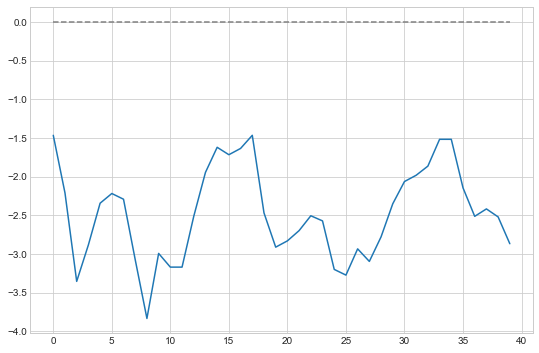

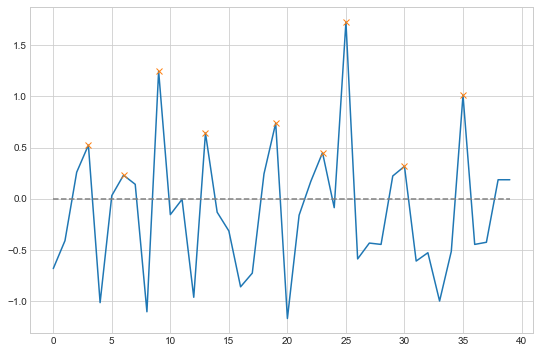

In [452]:
# example of there being no movement in a window 
# (when it's just the 7 with more than 15 mins of data)
import matplotlib.pyplot as plt
row = new_features[-100]
x = row[:,0]
peaks, _ = find_peaks(x, height=0.0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

# an example where there is movement in a window
row = new_features[1500]
x = row[:,0]
peaks, _ = find_peaks(x, height=0.0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [453]:
''' 
Then it's clear that there are some useless data points in this set because 
there is no movement. So we'll get rid of it.
'''
useful_feature_vector = feature_vector[feature_vector['avg_peaks'] != 0]

# now our training set and labels are ready to be used
X = useful_feature_vector.drop(columns=['user']).to_numpy()
y = useful_feature_vector['user'].to_numpy()

<h4>Prepare Models</h4>

In [454]:
def print_metrics(y_test, preds, model_name="N/A"):
    print(pd.crosstab(y_test, preds, rownames=['Actual User'], colnames=['Predicted User']))
    print("Accuracy For " + model_name + " Is: " + str(accuracy))

In [455]:
# first let's try a RF (Random Forest)

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

def random_forest(X_train, y_train, X_test, y_test, metrics=False):
    classifier = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=10)
    classifier.fit(X_train, y_train)
    preds = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    
    if metrics:
        print_metrics(y_test, preds, "Random Forest")
        
    return accuracy

In [456]:
# try a decision tree

from sklearn.tree import DecisionTreeClassifier

def decision_tree(X_train, y_train, X_test, y_test, metrics=False):

    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    preds = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    
    if metrics:
        print_metrics(y_test, preds, "Decision Tree")
        
    return accuracy


In [457]:
from sklearn import svm

def support_vector_machine(X_train, y_train, X_test, y_test, metrics=False):
    classifier = svm.SVC(gamma='auto')
    classifier.fit(X_train, y_train)
    preds = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    
    if metrics:
        print_metrics(y_test, preds, "Support Vector Machine")

    return accuracy



In [458]:
from sklearn.linear_model import LogisticRegression

def logistic_regression(X_train, y_train, X_test, y_test, metrics=False):
    classifier = LogisticRegression(random_state=0, 
                                    solver='newton-cg',
                                    multi_class='auto',
                                    max_iter=2000).fit(X_train, y_train)
    preds = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, preds)

    if metrics:
        print_metrics(y_test, preds, "Linear Regression")
        
    return accuracy


In [459]:
# quickly test models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
              X, y, test_size=0.33, random_state=42)

# looks like we're in business
random_forest(X_train, y_train, X_test, y_test)
#decision_tree(X_train, y_train, X_test, y_test)
#support_vector_machine(X_train, y_train, X_test, y_test)
#logistic_regression(X_train, y_train, X_test, y_test)


0.8030430461044422

<b>K-Fold Cross Validation</b>

In [462]:
from sklearn.model_selection import KFold

number_of_splits = 10
total_accuracy = 0

# perform kfold cross validation
kf = KFold(n_splits=number_of_splits, random_state=None, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # train model
    
    # random forest
    #accuracy = random_forest(X_train, y_train, X_test, y_test)
    
    # decision tree
    #accuracy = decision_tree(X_train, y_train, X_test, y_test)
    
    # svm
    accuracy = support_vector_machine(X_train, y_train, X_test, y_test)
    
    # logistic regression
    #accuracy = logistic_regression(X_train, y_train, X_test, y_test)



    
    print("Accuracy: " + str(accuracy))
    total_accuracy += accuracy
    
print("Accuracy after kfold cross validation is: " + str(total_accuracy/number_of_splits))

Accuracy: 0.6670030272452069
Accuracy: 0.6787787030027757
Accuracy: 0.6621246530406258
Accuracy: 0.6704516780217007
Accuracy: 0.661367650769619
Accuracy: 0.6664143325763311
Accuracy: 0.6699470098410295
Accuracy: 0.6686853393893515
Accuracy: 0.6664143325763311
Accuracy: 0.6765076961897553
Accuracy after kfold cross validation is: 0.6687694422652728


In [283]:
import torch 
import torchvision
import os

import random
import math
import torch.utils.data as tdata
import torch.optim as opt
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [9, 6]

In [126]:
n_epochs = 20
batch_size_train = 64
batch_size_test = 512
learning_rate = 0.001
logging_interval = 1
valid_percent = 0.2